In [139]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [140]:
#1 DATA EXPLORATION

#Identifying the Data Domain


'''
Context
A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, 
typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

--> Types of Smoke Detectors

- Photoelectric Smoke Detector
A photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. 
In some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. 
The received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; 
the circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.

- Ionization Smoke Detector
An ionization smoke detector uses a radioisotope to ionize air. If any smoke particles enter the open chamber, some of the ions 
will attach to the particles and not be available to carry the current in that chamber. An electronic circuit detects that a current 
difference has developed between the open and sealed chambers, and sounds the alarm


Columns descriptions:

Index


UTC
Timestamp UTC seconds


Temperature[C]
Air Temperature


Humidity[%]
Air Humidity


TVOC[ppb]
otal Volatile Organic Compounds; measured in parts per billion


eCO2[ppm]
co2 equivalent concentration; calculated from different values like TVCO


Raw H2
raw molecular hydrogen; not compensated (Bias, temperature, etc.)


Raw Ethanol
raw ethanol gas


Pressure[hPa]
Air Pressure


PM1.0
particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)


PM2.5
particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)


NC0.5
Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. 
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);


NC1.0
Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. 
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);


NC2.5
Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. 
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);


CNT
Sample counter



'''

'\nContext\nA smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, \ntypically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.\n\n--> Types of Smoke Detectors\n\n- Photoelectric Smoke Detector\nA photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. \nIn some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. \nThe received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; \nthe circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.\n\n- Ionization Smoke Detector\nAn ionization smoke detector uses a radioisotope to ioniz

In [141]:
#1.1 Data Collection

df = pd.read_csv('balanced_smoke_detection_iot.csv')
fire_alarm_counts = df['Fire Alarm'].value_counts()

# Print the counts
print("Counts in 'Fire Alarm' column:")
print(f"0: {fire_alarm_counts.get(0, 0)}")
print(f"1: {fire_alarm_counts.get(1, 0)}")

df= df.drop(columns='Fire Alarm')
df= df.drop(columns='CNT')
df= df.drop(columns='Index')

df.head(10)

Counts in 'Fire Alarm' column:
0: 10000
1: 10000


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,1654742670,-5.104,58.73,608,539,12872,19655,939.236,2.26,2.35,15.57,2.428,0.055
1,1655124667,25.649,43.91,50,409,12826,20718,937.584,2.47,2.56,16.99,2.649,0.060
2,1655126462,-5.060,42.30,165,445,12767,20562,937.339,1.75,1.82,12.06,1.880,0.042
3,1654716921,44.120,17.77,7,400,13575,21155,936.827,0.92,0.96,6.36,0.993,0.022
4,1654754476,0.620,47.55,1343,405,12951,19393,938.689,2.32,2.41,15.96,2.489,0.056
5,1654764754,19.890,60.74,285,400,13135,19923,939.664,1.54,1.60,10.57,1.648,0.037
6,1654746170,20.803,53.29,1040,545,12834,19471,938.904,2.08,2.17,14.35,2.237,0.051
7,1654717897,44.210,17.21,503,400,13801,20696,936.691,0.78,0.81,5.35,0.835,0.019
8,1654747797,15.417,49.69,1122,447,12863,19450,938.913,2.28,2.37,15.70,2.448,0.055
9,1654716633,48.380,23.24,14132,552,12736,19061,936.902,0.93,0.97,6.40,0.998,0.023


In [142]:
#1.2 Data Cleaning

# Check for missing values
print(df.isnull().sum())




UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
dtype: int64


Numerical Summary for column UTC:
Mean: 1654811848.58
Median: 1654761519.00
Standard Deviation: 140038.85
Min: 1654712187.00, Max: 1655130050.00
Range: 417863.00
Quantiles: 25th percentile = 1654736490.25, 50th percentile = 1654761519.00, 75th percentile = 1654779447.50
--------------------------------------------------


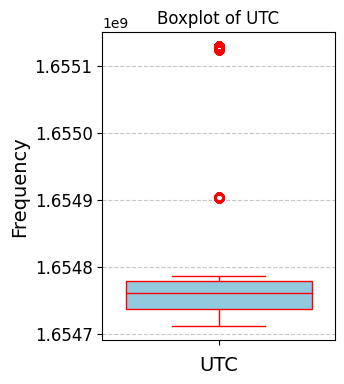

Numerical Summary for column Temperature[C]:
Mean: 17.02
Median: 20.20
Standard Deviation: 14.58
Min: -22.01, Max: 59.93
Range: 81.94
Quantiles: 25th percentile = 12.10, 50th percentile = 20.20, 75th percentile = 26.08
--------------------------------------------------


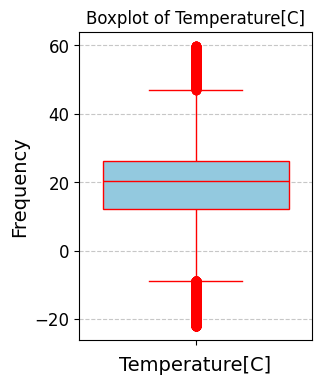

Numerical Summary for column Humidity[%]:
Mean: 46.94
Median: 49.07
Standard Deviation: 10.13
Min: 10.74, Max: 75.20
Range: 64.46
Quantiles: 25th percentile = 45.75, 50th percentile = 49.07, 75th percentile = 52.93
--------------------------------------------------


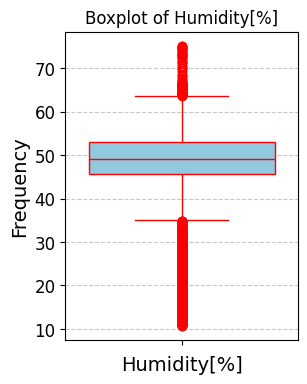

Numerical Summary for column TVOC[ppb]:
Mean: 2617.00
Median: 262.00
Standard Deviation: 9945.06
Min: 0.00, Max: 60000.00
Range: 60000.00
Quantiles: 25th percentile = 67.00, 50th percentile = 262.00, 75th percentile = 1164.00
--------------------------------------------------


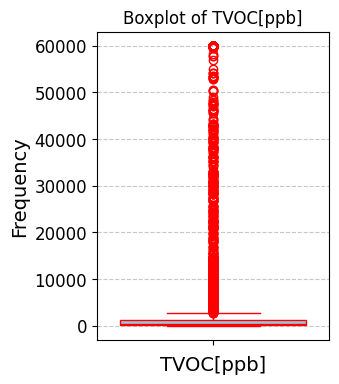

Numerical Summary for column eCO2[ppm]:
Mean: 736.03
Median: 400.00
Standard Deviation: 2155.99
Min: 400.00, Max: 39488.00
Range: 39088.00
Quantiles: 25th percentile = 400.00, 50th percentile = 400.00, 75th percentile = 428.00
--------------------------------------------------


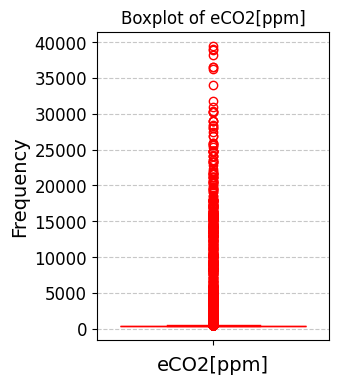

Numerical Summary for column Raw H2:
Mean: 12932.98
Median: 12917.00
Standard Deviation: 324.27
Min: 10668.00, Max: 13803.00
Range: 3135.00
Quantiles: 25th percentile = 12794.00, 50th percentile = 12917.00, 75th percentile = 13122.00
--------------------------------------------------


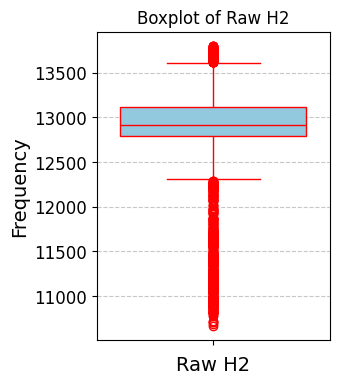

Numerical Summary for column Raw Ethanol:
Mean: 19861.54
Median: 19930.00
Standard Deviation: 735.11
Min: 15317.00, Max: 21410.00
Range: 6093.00
Quantiles: 25th percentile = 19445.00, 50th percentile = 19930.00, 75th percentile = 20258.25
--------------------------------------------------


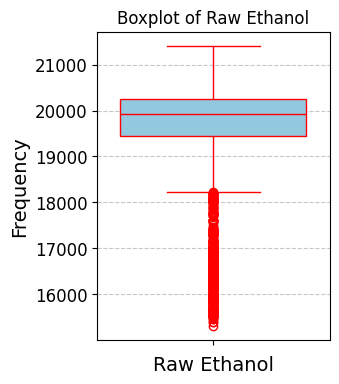

Numerical Summary for column Pressure[hPa]:
Mean: 938.49
Median: 938.77
Standard Deviation: 1.30
Min: 930.87, Max: 939.86
Range: 8.99
Quantiles: 25th percentile = 937.46, 50th percentile = 938.77, 75th percentile = 939.60
--------------------------------------------------


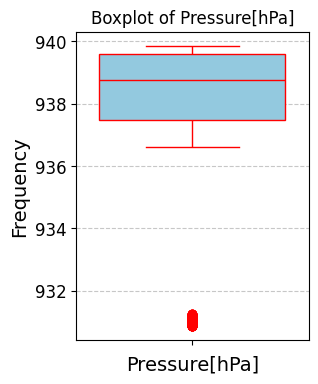

Numerical Summary for column PM1.0:
Mean: 141.07
Median: 1.76
Standard Deviation: 1077.11
Min: 0.00, Max: 14149.05
Range: 14149.05
Quantiles: 25th percentile = 0.88, 50th percentile = 1.76, 75th percentile = 2.05
--------------------------------------------------


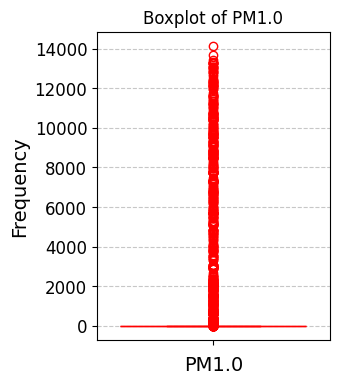

Numerical Summary for column PM2.5:
Mean: 251.08
Median: 1.83
Standard Deviation: 2205.60
Min: 0.00, Max: 44786.43
Range: 44786.43
Quantiles: 25th percentile = 0.92, 50th percentile = 1.83, 75th percentile = 2.13
--------------------------------------------------


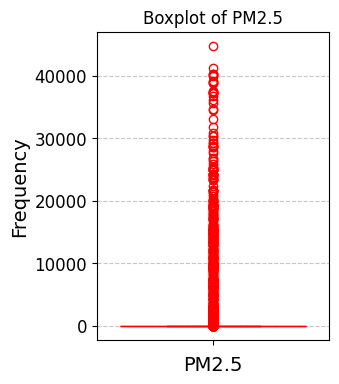

Numerical Summary for column NC0.5:
Mean: 708.37
Median: 12.09
Standard Deviation: 5163.87
Min: 0.00, Max: 61482.03
Range: 61482.03
Quantiles: 25th percentile = 6.08, 50th percentile = 12.09, 75th percentile = 14.09
--------------------------------------------------


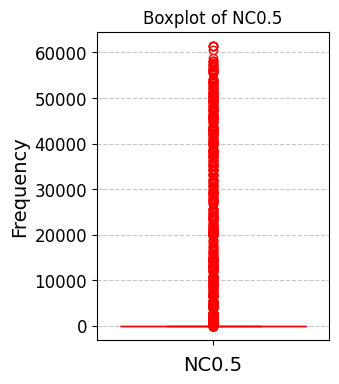

Numerical Summary for column NC1.0:
Mean: 276.40
Median: 1.89
Standard Deviation: 2463.63
Min: 0.00, Max: 51167.71
Range: 51167.71
Quantiles: 25th percentile = 0.95, 50th percentile = 1.89, 75th percentile = 2.20
--------------------------------------------------


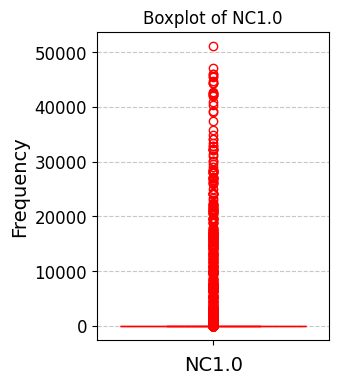

Numerical Summary for column NC2.5:
Mean: 104.87
Median: 0.04
Standard Deviation: 1165.17
Min: 0.00, Max: 29547.28
Range: 29547.28
Quantiles: 25th percentile = 0.02, 50th percentile = 0.04, 75th percentile = 0.05
--------------------------------------------------


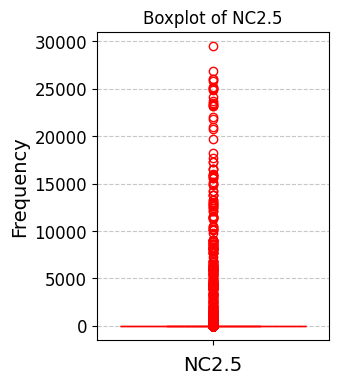

In [143]:

#1.3 Data Visualization & Statistical mesures

#1.3.1 Boxplot & Statistical mesures

'''

What Each Part of the Boxplot Represents:
Box (interquartile range - IQR):

The box represents the middle 50% of the data.
The bottom of the box is the 1st quartile (Q1) — 25% of the data is below this value.
The top of the box is the 3rd quartile (Q3) — 75% of the data is below this value.
The height of the box is the IQR = Q3 - Q1.
Line inside the box (Median):

This is the median (Q2) — 50% of the data is below this value.
It's a measure of the center of the distribution.
Whiskers:

The lines extending from the box are the whiskers.
They typically show the range of data within 1.5 times the IQR from Q1 and Q3.
Any data point outside this range is considered an outlier.
Outliers (dots):

Values that are far away from the majority of the data are shown as dots outside the whiskers.

'''

for column in df.columns:
    if column=="Index":continue
    


    # Compute the summary statistics
    mean = df[column].mean()
    median = df[column].median()
    std_dev = df[column].std()
    min_val = df[column].min()
    max_val = df[column].max()
    range_val = max_val - min_val
    quantiles = df[column].quantile([0.25, 0.5, 0.75])

    # Print the numerical summary for the current column
    print(f"Numerical Summary for column {column}:")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Min: {min_val:.2f}, Max: {max_val:.2f}")
    print(f"Range: {range_val:.2f}")
    print(f"Quantiles: 25th percentile = {quantiles[0.25]:.2f}, 50th percentile = {quantiles[0.5]:.2f}, 75th percentile = {quantiles[0.75]:.2f}")
    print('-' * 50)


    plt.figure(figsize=(3, 4))
    sns.boxplot(y=df[column], color='skyblue',linecolor='red')

    # Set title and labels
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
    plt.xticks(fontsize=12)  # Change font size for the x-axis
    plt.yticks(fontsize=12)  # Change font size for the y-axis
    # Display the plot
    plt.show()




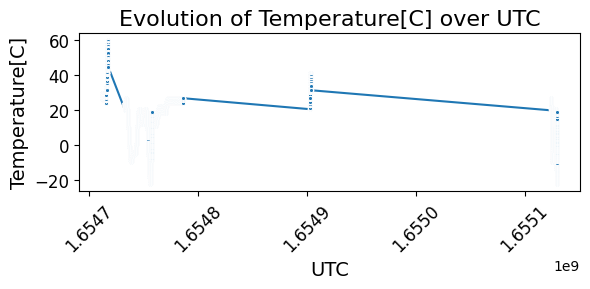

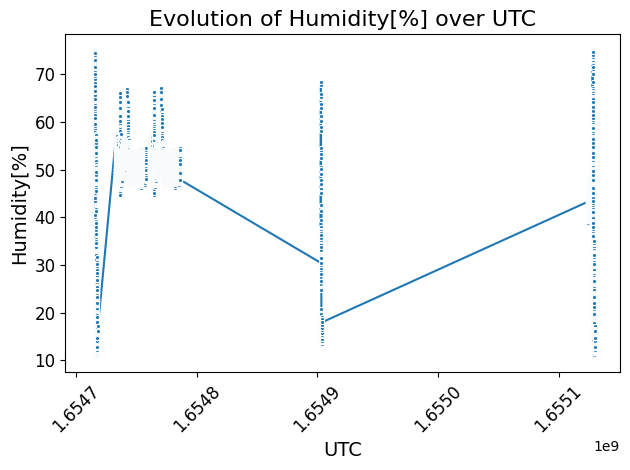

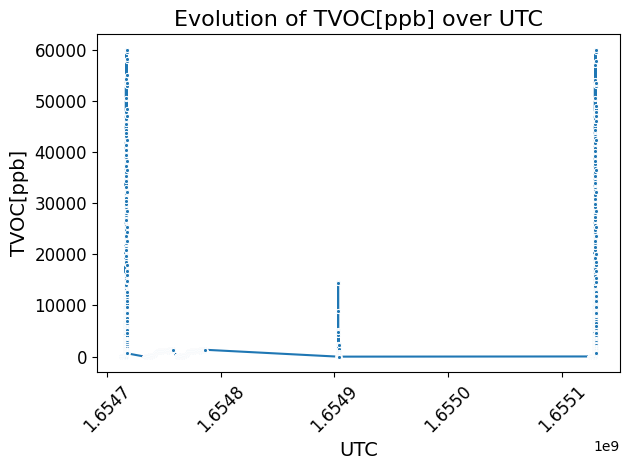

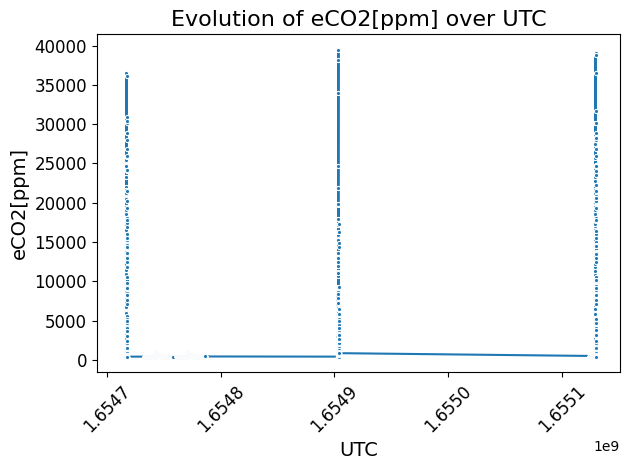

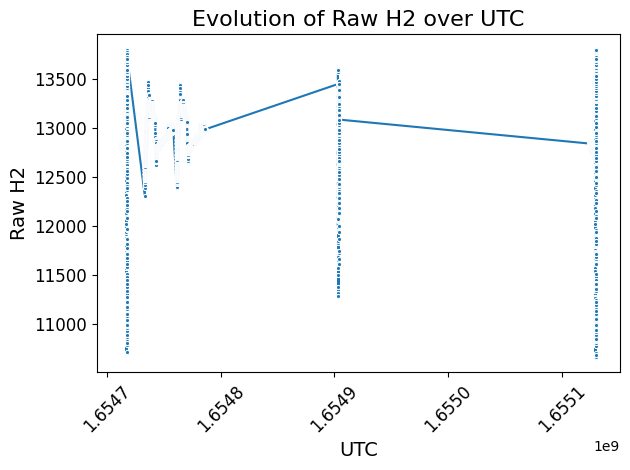

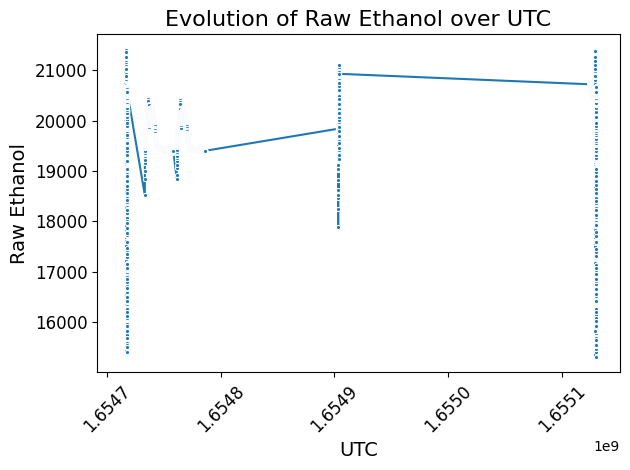

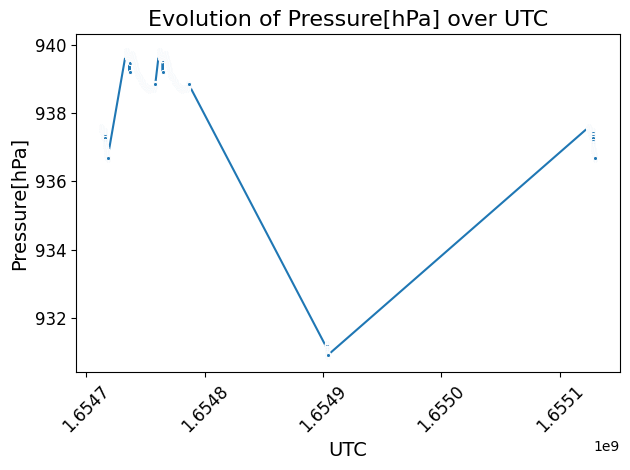

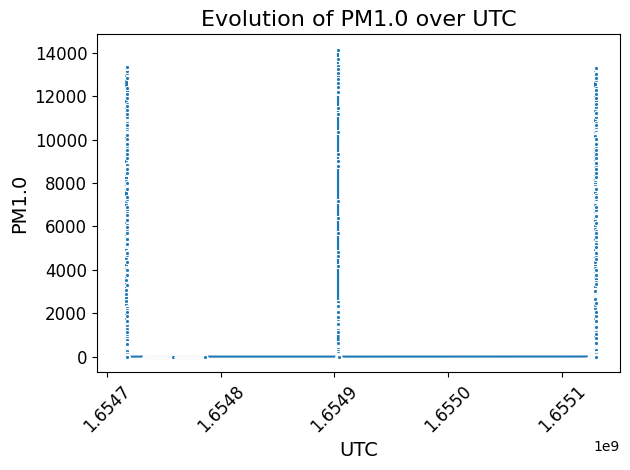

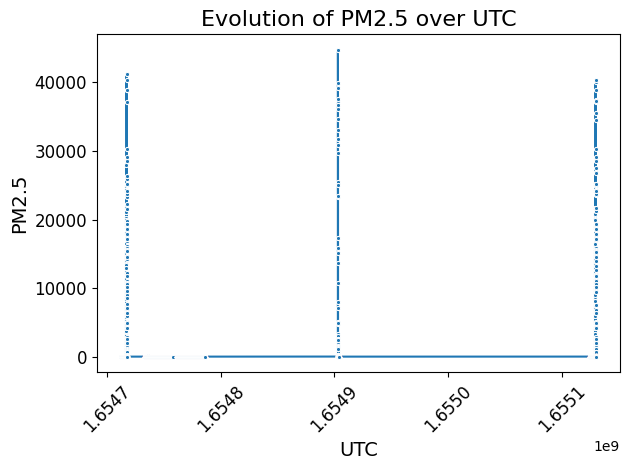

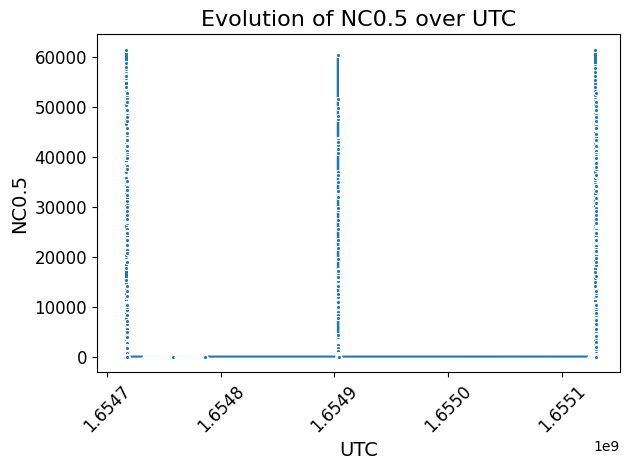

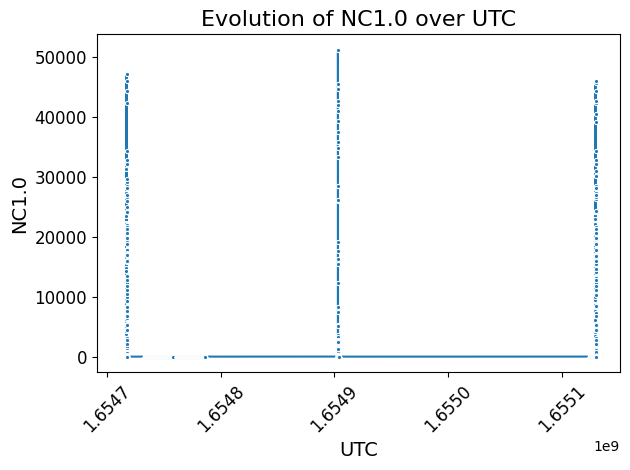

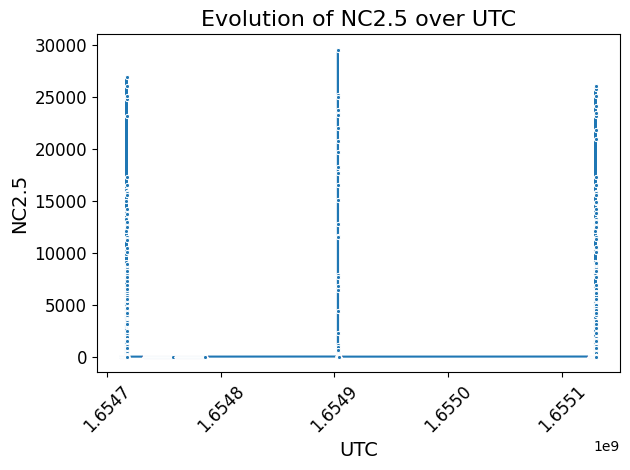

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# UTC = Timestamp
plt.figure(figsize=(6, 3))

for column in df.columns:
    if (column in ['UTC','Index']): continue
    # Create a line plot for column against UTC
    sns.lineplot(data=df, x='UTC', y=column, marker='.')

    # Set plot title and labels
    plt.title('Evolution of {} over UTC'.format(column), fontsize=16)
    plt.xlabel('UTC', fontsize=14)
    plt.ylabel(column, fontsize=14)

    # Customize the tick labels for better readability if needed
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis ticks if the UTC values are large or close together
    plt.yticks(fontsize=12)

    # Display the plot
    plt.tight_layout()  # Ensures that labels do not overlap
    plt.show()


In [145]:
# #1.3.2 Histogram

# for column in df.columns:
#     if column == "Index": continue
    
#     plt.figure(figsize=(4, 3))  # Adjust the size for histograms
#     sns.histplot(df[column], kde=True, bins=30)  # Histogram with KDE (Kernel Density Estimation)

#     # Set title and labels
#     plt.title(f'Histogram of {column}')
#     plt.xlabel(column, fontsize=14)
#     plt.ylabel('Frequency', fontsize=14)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
#     plt.xticks(fontsize=12)  # Change font size for the x-axis
#     plt.yticks(fontsize=12)  # Change font size for the y-axis
#     print(f"Median value for column {column} = {df[column].median()}", end=' ')
#     # Display the plot
#     plt.show()


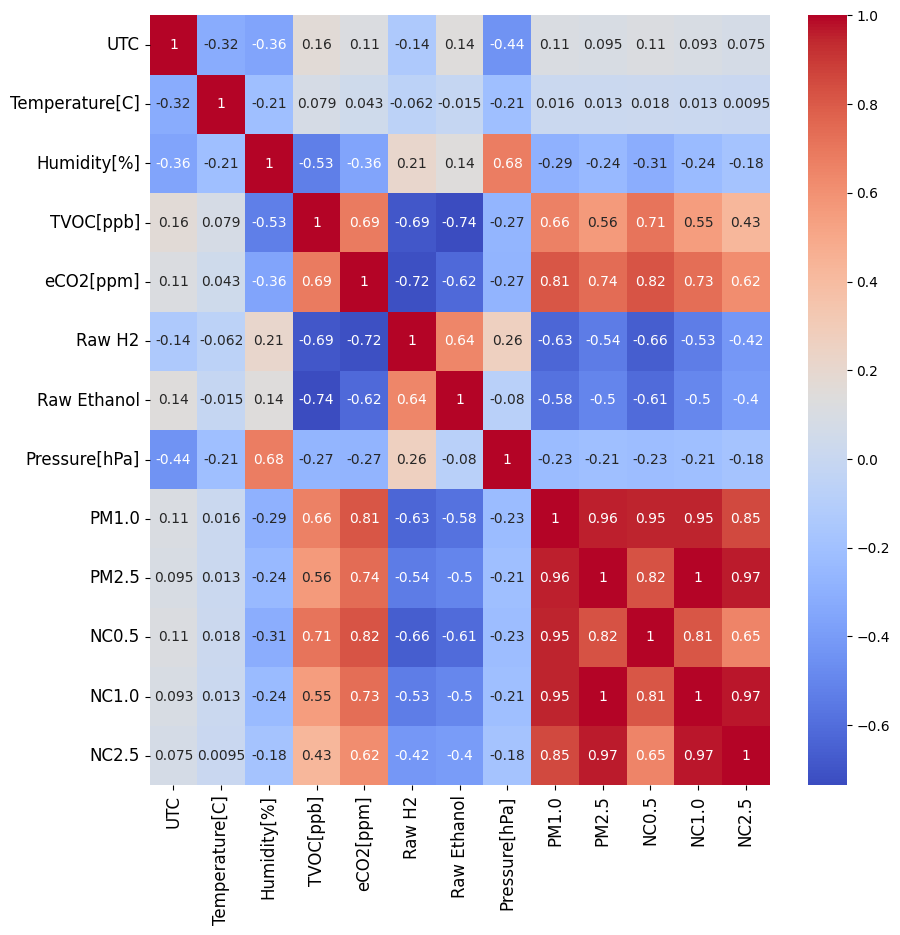

In [146]:

#1.3.3 Correlation matrix analysis
plt.figure(figsize=(10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 10})
plt.xticks(fontsize=12)  # Font size for x-axis labels
plt.yticks(fontsize=12)  # Font size for y-axis labels
plt.show()



In [147]:
#1.4 Data Transformation

from sklearn.preprocessing import StandardScaler

# Normalization
scaler = StandardScaler()

df_normalized= df.copy()

for column in df.columns:
    if (column in ['Index','CNT']): continue
    df_normalized[column] = scaler.fit_transform(df[[column]])

df_normalized.head(5)


,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,-0.494008,-1.518115,1.163916,-0.202015,-0.091388,-0.188052,-0.280969,0.578646,-0.128880,-0.112777,-0.134166,-0.111211,-0.089958
1,2.233853,0.591908,-0.299274,-0.258124,-0.151687,-0.329912,1.165112,-0.694938,-0.128685,-0.112681,-0.133891,-0.111121,-0.089954
2,2.246672,-1.515096,-0.458231,-0.246561,-0.134989,-0.511862,0.952893,-0.883817,-0.129354,-0.113017,-0.134846,-0.111433,-0.089969
3,-0.677883,1.859240,-2.880097,-0.262448,-0.155862,1.979932,1.759597,-1.278536,-0.130124,-0.113407,-0.135950,-0.111793,-0.089987
4,-0.409701,-1.125380,0.060106,-0.128107,-0.153542,0.055576,-0.637388,0.156945,-0.128824,-0.112749,-0.134091,-0.111186,-0.089957



<div>
<img src="image.png" width="600"/>
</div>

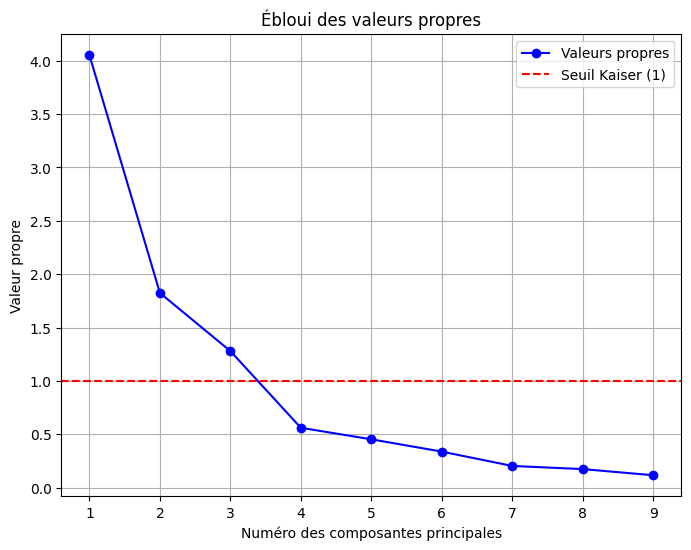

Composante principale 1: Valeur propre = 4.0506, Variance expliquée = 45.00%
Composante principale 2: Valeur propre = 1.8237, Variance expliquée = 20.26%
Composante principale 3: Valeur propre = 1.2794, Variance expliquée = 14.21%
Composante principale 4: Valeur propre = 0.5611, Variance expliquée = 6.23%
Composante principale 5: Valeur propre = 0.4531, Variance expliquée = 5.03%
Composante principale 6: Valeur propre = 0.3380, Variance expliquée = 3.75%
Composante principale 7: Valeur propre = 0.2037, Variance expliquée = 2.26%
Composante principale 8: Valeur propre = 0.1741, Variance expliquée = 1.93%
Composante principale 9: Valeur propre = 0.1167, Variance expliquée = 1.30%


In [148]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

df_normalized= df_normalized.drop(columns=[	'PM2.5',	'NC0.5',	'NC1.0',	'NC2.5'])

# Étape 1 : Réalisation de l'ACP
pca = PCA()
pca_result = pca.fit(df_normalized)

# Extraction des valeurs propres (variance expliquée par chaque composante)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Visualisation de l'ébloui des valeurs propres
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='b', label='Valeurs propres')
plt.axhline(y=1, color='red', linestyle='--', label='Seuil Kaiser (1)')
plt.title('Ébloui des valeurs propres')
plt.xlabel('Numéro des composantes principales')
plt.ylabel('Valeur propre')
plt.legend()
plt.grid(True)
plt.show()

# Affichage des valeurs propres et de leur importance
for i, eig in enumerate(eigenvalues, 1):
    print(f"Composante principale {i}: Valeur propre = {eig:.4f}, Variance expliquée = {explained_variance_ratio[i-1]*100:.2f}%")


Variance expliquée par chaque composante principale: [0.4500444  0.20262237 0.14214944 0.06234019 0.05034589 0.03754999
 0.02263005 0.01934735 0.01297031]
Variance totale expliquée: 1.0
Variance expliquée par chaque axe :
Composante principale 1 (PC1): 0.4500
Composante principale 2 (PC2): 0.2026
Composante principale 3 (PC3): 0.1421
Composante principale 4 (PC4): 0.0623
Composante principale 5 (PC5): 0.0503
Composante principale 6 (PC6): 0.0375
Composante principale 7 (PC7): 0.0226
Composante principale 8 (PC8): 0.0193
Composante principale 9 (PC9): 0.0130

Variance expliquée cumulée :
Composantes principales 1 à 1 : 0.4500
Composantes principales 1 à 2 : 0.6527
Composantes principales 1 à 3 : 0.7948
Composantes principales 1 à 4 : 0.8572
Composantes principales 1 à 5 : 0.9075
Composantes principales 1 à 6 : 0.9451
Composantes principales 1 à 7 : 0.9677
Composantes principales 1 à 8 : 0.9870
Composantes principales 1 à 9 : 1.0000


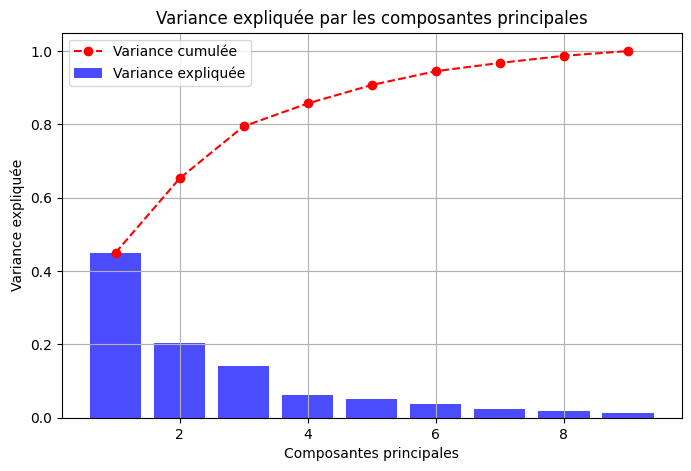

In [149]:
import matplotlib.pyplot as plt

# Afficher la variance expliquée par chaque composante principale
print(f"Variance expliquée par chaque composante principale: {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée: {sum(pca.explained_variance_ratio_)}")

# Analyser la variance expliquée
explained_variance = pca.explained_variance_ratio_  # Variance expliquée par chaque composante
cumulative_variance = explained_variance.cumsum()  # Variance expliquée cumulée

# Afficher les résultats
print("Variance expliquée par chaque axe :")
for i, var in enumerate(explained_variance, start=1):
    print(f"Composante principale {i} (PC{i}): {var:.4f}")

print("\nVariance expliquée cumulée :")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"Composantes principales 1 à {i} : {cum_var:.4f}")

# Visualiser la variance expliquée
plt.figure(figsize=(8, 5))

# Bar plot for explained variance of each principal component
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='b', label='Variance expliquée')

# Plot for cumulative variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r', label='Variance cumulée')

# Labels and title
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.title('Variance expliquée par les composantes principales')

# Add legend and grid
plt.legend()
plt.grid(True)
plt.show()



In [150]:

# Afficher les colonnes du DataFrame original
print(df_normalized.columns, end="\n\n")
# Appliquer l'ACP pour 3 dimensions puisque la variance cumulée > 0.8
pca = PCA(n_components=3)  
# Ajuster l'ACP sur les données normalisées
pca_result = pca.fit_transform(df_normalized)
# Créer un DataFrame avec les composantes principales
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
# Afficher les premières lignes du DataFrame après transformation
print(df_pca.head(10))

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0'],
      dtype='object')

        PC1       PC2       PC3
0 -0.589770  1.292388 -1.328076
1 -0.000250 -2.126666 -0.443553
2  0.140269 -2.118700 -2.132685
3 -0.588925 -2.830817  2.797240
4 -0.125495  0.567633 -0.747459
5 -1.116729  1.164654 -0.036493
6 -0.129647  0.916588  0.257908
7 -0.586616 -2.776006  2.858253
8 -0.092613  0.756135  0.025007
9  2.017933 -1.029425  2.740494


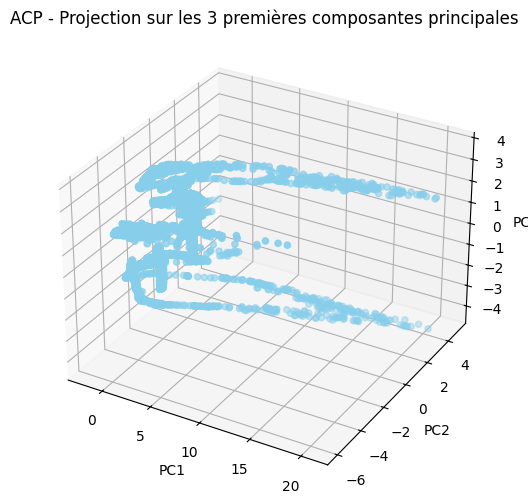

In [151]:
# Importer les bibliothèques nécessaires pour la visualisation 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Visualiser les résultats de l'ACP en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tracer le nuage de points en 3D
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], color='skyblue')

# Ajouter des titres et des labels
ax.set_title('ACP - Projection sur les 3 premières composantes principales')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Afficher la visualisation
plt.show()




KMeans_Cluster
0    6278
9    4373
1    2772
4    2732
5    2379
8     579
2     369
7     242
6     141
3     135
Name: count, dtype: int64


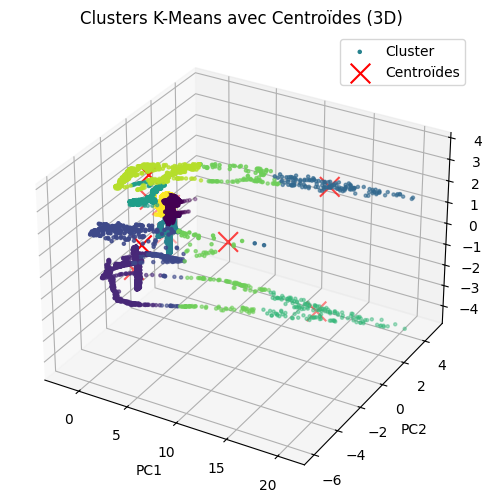

In [157]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer K-Means avec n_init explicitement défini
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df_pca['KMeans_Cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

print(df_pca['KMeans_Cluster'].value_counts())



# Transformez les centroïdes des clusters dans l'espace PCA en utilisant pca.transform()
centroids = kmeans.cluster_centers_
# Ajouter les centroïdes au graphique en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Tracer le nuage de points en 3D avec les clusters K-Means
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], marker='.',
                     c=df_pca['KMeans_Cluster'], cmap='viridis', label='Cluster')

# Tracer les centroïdes en 3D
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],  # Utiliser PC1, PC2, PC3 des centroïdes
    s=200, c='red', marker='x', label='Centroïdes'
)

# Ajouter des titres et des labels
ax.set_title('Clusters K-Means avec Centroïdes (3D)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Afficher la légende
ax.legend()

# Afficher la visualisation
plt.show()

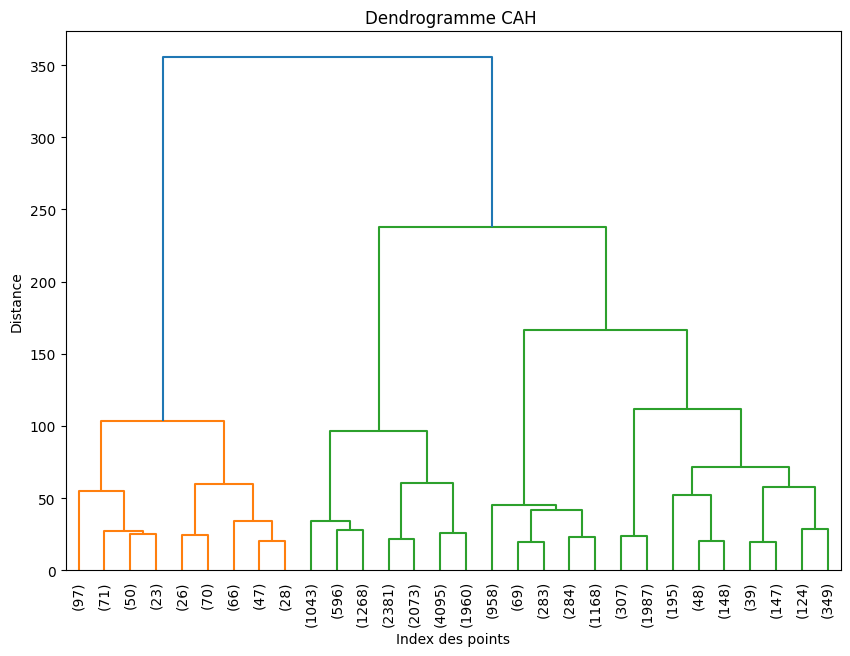

In [163]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculer la matrice de linkage pour les 3 composantes principales
Z = linkage(df_pca[['PC1', 'PC2', 'PC3']],method='ward', metric='euclidean')

# Tracer le dendrogramme en utilisant les 3 premières composantes principales
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme CAH ")
plt.xlabel("Index des points")
plt.ylabel("Distance")
plt.show()


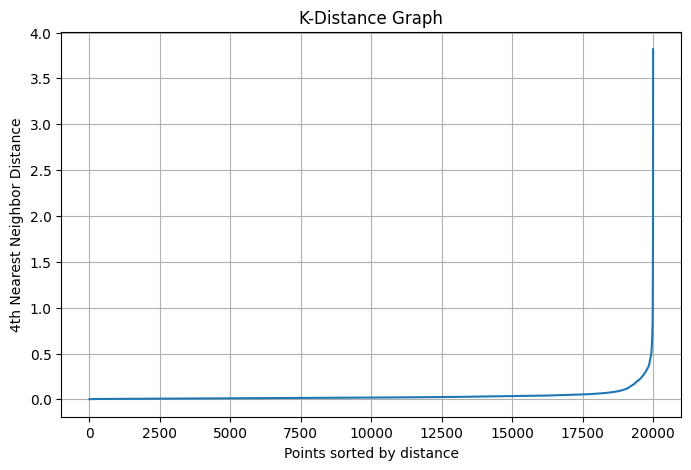

0.44753687614577714


In [160]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# Choose k = min_samples - 1
k = 4  # Typically min_samples = 5, so k = 4
nearest_neighbors = NearestNeighbors(n_neighbors=k)
neighbors = nearest_neighbors.fit(df_pca[['PC1', 'PC2', 'PC3']])
distances, indices = neighbors.kneighbors(df_pca[['PC1', 'PC2', 'PC3']])

# Sort distances and plot
distances = np.sort(distances[:, -1])  # Take the k-th nearest neighbor distances
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th Nearest Neighbor Distance')
plt.grid()
plt.show()


# Find the elbow point
knee = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
eps_value = distances[knee.knee]  # Get the eps value at the knee point

print(eps_value)

In [162]:
from sklearn.cluster import DBSCAN

# Appliquer DBSCAN avec les 4 dimensions principales
dbscan = DBSCAN(eps=eps_value, min_samples=5)  # Vous pouvez ajuster eps et min_samples
df_pca['DBSCAN_Cluster'] = dbscan.fit_predict(df_pca[['PC1', 'PC2', 'PC3']])

# Compter le nombre de points dans chaque cluster
cluster_counts = df_pca['DBSCAN_Cluster'].value_counts()
print(cluster_counts)

DBSCAN_Cluster
 0     16349
 1      2920
 4       155
 2       139
 5       110
-1        74
 9        32
 8        31
 13       31
 17       19
 12       18
 11       18
 10       13
 21       13
 16       11
 3        11
 20       10
 15        9
 6         7
 19        7
 18        6
 14        6
 22        6
 7         5
Name: count, dtype: int64
